
# Project: An Investigation on Factors Infuencing Foreign Investment Inflows of China and the United States

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset
In this project, I selected economic data from Gapminder, including foreign investment inflows, foreign investment outflows, investments, central bank discount rate, inflation, hourly labour cost, tax revenue, market value of listed companies. The meaning of each variables are listed as follows.

> **Foreign investment inflows (% of GDP)**: net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor
>
> **Foreign investment outflows (% of GDP)**: net outflows of investment from the reporting country to the rest of the world
>
> **Investments (% of GDP)**: gross domestic investments
>
> **Central bank discount rate (annual %)**: central bank discount rate of the reporting country
>
> **Inflation (annual %)**: shows the rate of price change in the economy as a whole
>
> **Hourly labour cost**: average hourly cost per employee
>
> **Tax Revenue (% of GDP)**: compulsory transfers to the central government for public purposes
>
> **Market value of listed companies (% of GDP)**: share price times number of shares outstanding for listed domestic companies

### Question 1 

What factors may affect foreign investment inflows in China?

### Question 2

What factors may affect foreign investment inflows in the United States?



<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

In [1]:
# Import the relevant libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
# Import the data respectively

In [46]:
for_inv_inf = pd.read_csv('Desktop/Proj 2/foreign_investment_inflows.csv')
for_inv_out = pd.read_csv('Desktop/Proj 2/foreign_investment_outflows.csv')
inv = pd.read_csv('Desktop/Proj 2/investments.csv')
dis_r = pd.read_csv('Desktop/Proj 2/central_bank_discount_rate.csv')
inf = pd.read_csv('Desktop/Proj 2/inflation.csv')
lab_c = pd.read_csv('Desktop/Proj 2/hourly_labour_cost.csv')
tax_rev = pd.read_csv('Desktop/Proj 2/tax_revenue.csv')
lis_com_val = pd.read_csv('Desktop/Proj 2/listed_companies_value.csv')

In [47]:
# Preview foreign investment inflows data

In [48]:
for_inv_inf.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.000132,0.000246,0.000094,0.000156,NaN,NaN,0.000016,-0.000081,NaN,...,0.0120,0.00293,0.00284,0.00235,0.00210,0.00850,0.00483,0.00255,0.00613,0.00123
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0914,0.08140,0.07450,0.09820,0.08690,0.08690,0.08810,0.07860,0.07950,0.07860
2,Algeria,0.016500,0.000118,0.006140,0.005850,0.0271,0.00765,0.010500,0.008510,0.00513,...,0.0143,0.01290,0.00718,0.00807,0.00703,-0.00324,0.01020,0.00717,0.00844,0.00813
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0385,-0.02700,-0.01140,-0.05210,0.02510,0.08630,-0.00178,-0.06060,-0.06370,-0.04330
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028400,-0.07850,...,0.0842,0.05730,0.10800,0.11400,0.03700,0.08530,0.06780,0.10700,0.08390,0.08070


In [49]:
# Query for data of China and the United States

In [50]:
for_inv_inf_CN = for_inv_inf.query('country == "China"')
for_inv_inf_US = for_inv_inf.query('country == "United States"')
print(for_inv_inf_CN)
print(for_inv_inf_US)

   country  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  2010  \
34   China   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  0.04   

      2011    2012    2013    2014    2015    2016    2017    2018    2019  
34  0.0371  0.0283  0.0304  0.0256  0.0219  0.0156  0.0135  0.0169  0.0109  

[1 rows x 51 columns]
           country     1970      1971      1972     1973     1974     1975  \
180  United States  0.00114  0.000661  0.000993  0.00135  0.00229  0.00137   

        1976    1977     1978  ...    2010   2011    2012    2013    2014  \
180  0.00155  0.0014  0.00234  ...  0.0176  0.017  0.0155  0.0172  0.0144   

       2015    2016    2017    2018    2019  
180  0.0281  0.0254  0.0188  0.0127  0.0165  

[1 rows x 51 columns]


In [51]:
# Continue the same data query process for the rest of the variables

In [52]:
for_inv_out.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000079,0.000064,-0.000443,0.000026,-9.000000e-07,0.000109,0.000723,0.000558,0.001990,0.001380
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003890,0.015700,0.006750,0.002230,5.720000e-03,0.006970,0.000593,-0.008160,-0.000298,0.002620
2,Algeria,0.000411,0.000197,0.000296,0.000115,NaN,0.00219,0.000169,0.000265,0.00001,...,0.001360,0.002670,-0.000198,-0.001300,-8.690000e-05,0.000609,0.000291,-0.000020,0.005060,0.000487
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016000,0.018700,0.006920,0.006740,6.090000e-03,-0.006750,0.002700,0.011100,0.000056,-0.024800
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,5.070000e-03,0.010500,0.026400,-0.001590,-0.018600,0.006530


In [53]:
for_inv_out_CN = for_inv_out.query('country == "China"')
for_inv_out_US = for_inv_out.query('country == "United States"')
print(for_inv_out_CN)
print(for_inv_out_US)

   country  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  \
34   China   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

       2010     2011     2012     2013    2014    2015    2016    2017  \
34  0.00952  0.00641  0.00761  0.00762  0.0118  0.0158  0.0193  0.0112   

      2018     2019  
34  0.0103  0.00681  

[1 rows x 51 columns]
           country     1970     1971     1972     1973     1974     1975  \
175  United States  0.00605  0.00482  0.00573  0.00655  0.00334  0.00815   

        1976     1977     1978  ...    2010    2011    2012    2013    2014  \
175  0.00604  0.00542  0.00611  ...  0.0233  0.0281  0.0233  0.0234  0.0221   

       2015   2016    2017     2018     2019  
175  0.0166  0.016  0.0208 -0.00737  0.00882  

[1 rows x 51 columns]


In [54]:
inv.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.161,0.166,0.191,0.142,0.139,0.113,0.0841,0.0518,0.0647,...,0.180,0.167,0.169,0.173,0.182,0.195,0.178,0.192,0.190,0.178
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.303,0.314,0.283,0.281,0.257,0.258,0.252,0.251,NaN,NaN
2,Algeria,0.422,0.472,0.354,0.289,0.218,0.226,0.1730,0.2340,0.2790,...,0.414,0.381,0.392,0.434,0.456,0.508,0.508,0.480,0.471,0.443
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.282,0.264,0.267,0.261,0.275,0.342,0.272,0.241,0.179,NaN
4,Argentina,0.235,0.278,0.217,0.183,0.215,0.224,0.2050,0.2120,0.2170,...,0.177,0.184,0.165,0.173,0.173,0.171,0.177,0.188,0.210,0.182


In [55]:
inv_CN = inv.query('country == "China"')
inv_US = inv.query('country == "United States"')
print(inv_CN)
print(inv_US)

   country   1960   1961   1962   1963   1964   1965   1966   1967   1968  \
33   China  0.396  0.228  0.157  0.218  0.243  0.271  0.305  0.239  0.249   

    ...   2010   2011   2012   2013   2014   2015   2016  2017   2018  2019  
33  ...  0.466  0.467  0.462  0.464  0.458  0.432  0.426  0.43  0.438   NaN  

[1 rows x 61 columns]
           country  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
169  United States   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

      2010   2011  2012   2013   2014   2015   2016   2017  2018  2019  
169  0.187  0.191   0.2  0.204  0.208  0.211  0.204  0.207  0.21   NaN  

[1 rows x 61 columns]


In [56]:
dis_r.head()

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.32,0.23,0.18,0.11,0.07,0.09,0.07,0.05,0.05,0.06
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.11,0.10,0.09,0.06,0.06,0.06,0.05,0.04,0.04,0.04
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.48,0.58,1.20,1.50,1.50,1.50,1.50,0.95,0.95,0.14
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,0.08,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.07
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
dis_r_CN = dis_r.query('country == "China"')
dis_r_US = dis_r.query('country == "United States"')
print(dis_r_CN)
print(dis_r_US)

   country  1948  1949  1950  1951  1952  1953  1954  1955  1956  ...  1997  \
27   China   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  0.09   

    1998  1999  2000  2001  2002  2003  2004  2005  2006  
27  0.05  0.03  0.03  0.03  0.03  0.03  0.03  0.03  0.03  

[1 rows x 60 columns]
           country  1948  1949  1950  1951  1952  1953  1954  1955  1956  ...  \
133  United States  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.03  0.03  ...   

     1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  
133  0.05  0.05  0.05  0.06  0.01  0.01  0.02  0.03  0.05  0.06  

[1 rows x 60 columns]


In [58]:
inf.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03810,0.16600,0.07300,0.04820,0.00567,0.02450,0.05100,0.0195,0.00618,0.02240
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04490,0.02310,0.01040,0.00289,0.01550,0.00564,-0.00632,0.0145,0.01360,0.00382
2,Algeria,0.0347,0.0235,0.00549,0.017,0.015,0.0182,0.0131,0.0314,0.0192,...,0.16100,0.18200,0.07460,-0.00094,-0.00301,-0.06460,0.01550,0.0470,0.07560,-0.00651
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00374,0.00197,0.00175,0.00448,-0.00084,0.00661,0.00348,0.0114,0.01010,0.01510
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.31700,0.31800,0.07260,0.02840,0.03560,-0.03520,0.21800,0.2260,0.29100,0.35900


In [59]:
inf_CN = inf.query('country == "China"')
inf_US = inf.query('country == "United States"')
print(inf_CN)
print(inf_US)

   country   1961     1962    1963     1964    1965    1966     1967    1968  \
35   China  0.153 -0.00115 -0.0262 -0.00362  0.0087 -0.0156  0.00814  0.0136   

      1969  ...    2010    2011    2012    2013    2014      2015    2016  \
35 -0.0379  ...  0.0688  0.0808  0.0234  0.0216  0.0103 -0.000034  0.0141   

      2017   2018    2019  
35  0.0423  0.035  0.0158  

[1 rows x 60 columns]
           country    1961    1962    1963   1964    1965   1966    1967  \
184  United States  0.0135  0.0124  0.0109  0.015  0.0192  0.029  0.0315   

       1968    1969  ...    2010    2011    2012    2013    2014    2015  \
184  0.0437  0.0496  ...  0.0117  0.0209  0.0192  0.0175  0.0189  0.0107   

       2016   2017    2018    2019  
184  0.0109  0.019  0.0236  0.0174  

[1 rows x 60 columns]


In [60]:
lab_c.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.04,1.14,NaN,NaN,NaN,NaN
1,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.64,3.79,3.57,3.89,NaN,NaN
2,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.90,NaN,NaN,NaN,NaN,NaN
3,Austria,NaN,NaN,NaN,NaN,NaN,25.4,25.6,26.7,27.9,...,30.1,30.9,33.00,33.4,34.60,36.50,38.40,39.30,40.5,40.9
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.14,8.9,8.32,8.79,9.51,10.00,11.6,11.0


In [61]:
lab_c_CN = lab_c.query('country == "China"')
lab_c_US = lab_c.query('country == "United States"')
print(lab_c_CN)
print(lab_c_US)

Empty DataFrame
Columns: [country, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [country, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Index: []

[0 rows x 23 columns]


It turns out there are no data for hourly labour cost of China and the United States. Therefore, I will drop this variable for both countries.

In [62]:
tax_rev.head()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0917,0.0892,0.0771,0.0712,0.0688,0.0759,0.0884,0.0925,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.1800,0.1750,0.1650,0.1830,0.1850,0.1760,0.1890,0.186,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1660,0.1610,0.1480,0.1420,0.1350,0.1100,0.0973,0.0922,NaN,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1290,0.1270,0.1300,0.1250,0.1260,0.1230,0.1210,0.1100,0.101,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1710,0.1720,0.1750,0.2160,0.2160,0.2090,0.2130,0.2080,0.209,NaN


In [63]:
tax_rev_CN = tax_rev.query('country == "China"')
tax_rev_US = tax_rev.query('country == "United States"')
print(tax_rev_CN)
print(tax_rev_US)

   country  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...   2010  \
30   China   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  0.102   

     2011   2012    2013    2014    2015    2016    2017  2018  2019  
30  0.103  0.103  0.0991  0.0968  0.0938  0.0912  0.0942   NaN   NaN  

[1 rows x 49 columns]
           country   1972   1973   1974   1975   1976   1977   1978  1979  \
149  United States  0.118  0.115  0.118  0.112  0.107  0.116  0.115  0.12   

      1980  ...   2010    2011   2012   2013  2014   2015   2016   2017  \
149  0.121  ...  0.086  0.0957  0.098  0.105  0.11  0.112  0.109  0.118   

       2018    2019  
149  0.0964  0.0962  

[1 rows x 49 columns]


In [64]:
lis_com_val.head()

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000654,0.000984,0.000798,0.000843,0.000787,0.000868,0.00259,0.00211,0.00214,NaN
1,Argentina,NaN,NaN,0.0147,0.0309,0.0624,0.0514,0.0177,0.0115,0.0133,...,0.151000,0.082200,0.062700,0.096200,0.114000,0.094400,0.11400,0.16900,0.08850,0.0876
2,Australia,NaN,NaN,NaN,NaN,0.2890,0.3980,0.3080,0.2140,0.3050,...,1.270000,0.858000,0.897000,0.867000,0.878000,0.878000,1.05000,1.13000,0.88100,1.0700
3,Austria,0.0325,0.0349,0.0289,0.2810,0.0281,0.0238,0.0223,0.0212,0.0212,...,0.322000,0.198000,0.259000,0.274000,0.219000,0.252000,0.30600,0.36000,0.25600,0.2980
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
lis_com_val_CN = lis_com_val.query('country == "China"')
lis_com_val_US = lis_com_val.query('country == "United States"')
print(lis_com_val_CN)
print(lis_com_val_US)

   country  1975  1976  1977  1978  1979  1980  1981  1982  1983  ...   2010  \
15   China   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  0.662   

     2011   2012   2013   2014  2015   2016   2017   2018   2019  
15  0.452  0.433  0.413  0.573  0.74  0.652  0.708  0.455  0.594  

[1 rows x 46 columns]
          country  1975  1976  1977  1978  1979   1980   1981   1982   1983  \
90  United States   NaN   NaN   NaN   NaN   NaN  0.476  0.394  0.436  0.498   

    ...  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
90  ...  1.15  1.01  1.15  1.43   1.5  1.38  1.46  1.65  1.48   NaN  

[1 rows x 46 columns]


In [66]:
# Join the variables for each country

In [67]:
CN = [for_inv_inf_CN, for_inv_out_CN, inv_CN, dis_r_CN, inf_CN, tax_rev_CN, lis_com_val_CN]
index_CN = ["for_inv_inf_CN", "for_inv_out_CN", "inv_CN", "dis_r_CN", "inf_CN", "tax_rev_CN", "lis_com_val_CN"]
CN = pd.concat(CN, join='inner', ignore_index=True)
CN

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,China,NaN,NaN,NaN,NaN,4.000000e-07,0.000298,0.00135,0.002100,0.002760,...,0.04730,0.04440,0.03750,0.03480,0.03510,0.03610,0.03490,0.03480,0.04550,0.0451
1,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000215,0.000403,...,0.00392,0.00440,0.00369,0.00381,0.00724,0.00427,0.00509,0.00408,0.00601,0.0087
2,China,0.3500,0.33200,0.3390,0.3760,3.630000e-01,0.346000,0.32900,0.320000,0.319000,...,0.35500,0.34800,0.34100,0.33600,0.35500,0.36200,0.39600,0.41800,0.40300,0.3990
3,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09000,0.05000,0.03000,0.03000,0.03000,0.03000,0.03000,0.03000,0.03000,0.0300
4,China,-0.0113,-0.00106,0.0109,0.0167,3.590000e-02,0.037800,0.02300,-0.000646,0.011000,...,0.01620,-0.00893,-0.01270,0.02060,0.02040,0.00605,0.02610,0.06950,0.03900,0.0393
5,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08570,0.0906
6,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.30900,0.22900,0.17600,0.4160


In [68]:
US = [for_inv_inf_US, for_inv_out_US, inv_US, dis_r_US, inf_US, tax_rev_US, lis_com_val_US]
index_US = ["for_inv_inf_US", "for_inv_out_US", "inv_US", "dis_r_US", "inf_US", "tax_rev_US", "lis_com_val_US"]
US = pd.concat(US, join='inner', ignore_index=True)
US

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,United States,0.00137,0.00155,0.00140,0.00234,0.00306,0.00586,0.00801,0.00635,0.00316,...,0.0142,0.0233,0.0324,0.0341,0.0163,0.0102,0.0102,0.0175,0.01090,0.0216
1,United States,0.00815,0.00604,0.00542,0.00611,0.00941,0.00666,0.00315,0.00232,0.00241,...,0.0142,0.0193,0.0257,0.0182,0.0138,0.0164,0.0170,0.0306,0.00403,0.0205
2,United States,0.20300,0.22000,0.23500,0.24800,0.25100,0.23300,0.24300,0.22100,0.22300,...,0.2240,0.2300,0.2340,0.2370,0.2220,0.2170,0.2170,0.2270,0.23400,0.2350
3,United States,0.06000,0.05000,0.06000,0.10000,0.12000,0.13000,0.12000,0.09000,0.09000,...,0.0500,0.0500,0.0500,0.0600,0.0100,0.0100,0.0200,0.0300,0.05000,0.0600
4,United States,0.09260,0.05500,0.06210,0.07030,0.08300,0.09030,0.09460,0.06180,0.03920,...,0.0172,0.0113,0.0144,0.0224,0.0219,0.0158,0.0186,0.0269,0.03110,0.0303
5,United States,0.11200,0.10700,0.11600,0.11500,0.12000,0.12100,0.12600,0.12000,0.10300,...,0.1180,0.1230,0.1230,0.1300,0.1190,0.0986,0.0939,0.0954,0.10700,0.1130
6,United States,NaN,NaN,NaN,NaN,NaN,0.47600,0.39400,0.43600,0.49800,...,1.2600,1.4300,1.5300,1.4700,1.3200,1.0100,1.2500,1.3400,1.30000,1.4200


In [69]:
# Change the indices to more specific keywords

In [70]:
CN.index = index_CN
CN

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
for_inv_inf_CN,China,NaN,NaN,NaN,NaN,4.000000e-07,0.000298,0.00135,0.002100,0.002760,...,0.04730,0.04440,0.03750,0.03480,0.03510,0.03610,0.03490,0.03480,0.04550,0.0451
for_inv_out_CN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000215,0.000403,...,0.00392,0.00440,0.00369,0.00381,0.00724,0.00427,0.00509,0.00408,0.00601,0.0087
inv_CN,China,0.3500,0.33200,0.3390,0.3760,3.630000e-01,0.346000,0.32900,0.320000,0.319000,...,0.35500,0.34800,0.34100,0.33600,0.35500,0.36200,0.39600,0.41800,0.40300,0.3990
dis_r_CN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09000,0.05000,0.03000,0.03000,0.03000,0.03000,0.03000,0.03000,0.03000,0.0300
inf_CN,China,-0.0113,-0.00106,0.0109,0.0167,3.590000e-02,0.037800,0.02300,-0.000646,0.011000,...,0.01620,-0.00893,-0.01270,0.02060,0.02040,0.00605,0.02610,0.06950,0.03900,0.0393
tax_rev_CN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08570,0.0906
lis_com_val_CN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.30900,0.22900,0.17600,0.4160


In [71]:
US.index = index_US
US

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
for_inv_inf_US,United States,0.00137,0.00155,0.00140,0.00234,0.00306,0.00586,0.00801,0.00635,0.00316,...,0.0142,0.0233,0.0324,0.0341,0.0163,0.0102,0.0102,0.0175,0.01090,0.0216
for_inv_out_US,United States,0.00815,0.00604,0.00542,0.00611,0.00941,0.00666,0.00315,0.00232,0.00241,...,0.0142,0.0193,0.0257,0.0182,0.0138,0.0164,0.0170,0.0306,0.00403,0.0205
inv_US,United States,0.20300,0.22000,0.23500,0.24800,0.25100,0.23300,0.24300,0.22100,0.22300,...,0.2240,0.2300,0.2340,0.2370,0.2220,0.2170,0.2170,0.2270,0.23400,0.2350
dis_r_US,United States,0.06000,0.05000,0.06000,0.10000,0.12000,0.13000,0.12000,0.09000,0.09000,...,0.0500,0.0500,0.0500,0.0600,0.0100,0.0100,0.0200,0.0300,0.05000,0.0600
inf_US,United States,0.09260,0.05500,0.06210,0.07030,0.08300,0.09030,0.09460,0.06180,0.03920,...,0.0172,0.0113,0.0144,0.0224,0.0219,0.0158,0.0186,0.0269,0.03110,0.0303
tax_rev_US,United States,0.11200,0.10700,0.11600,0.11500,0.12000,0.12100,0.12600,0.12000,0.10300,...,0.1180,0.1230,0.1230,0.1300,0.1190,0.0986,0.0939,0.0954,0.10700,0.1130
lis_com_val_US,United States,NaN,NaN,NaN,NaN,NaN,0.47600,0.39400,0.43600,0.49800,...,1.2600,1.4300,1.5300,1.4700,1.3200,1.0100,1.2500,1.3400,1.30000,1.4200


In [72]:
# Transpose the datasets to make plotting easier

In [73]:
CN = CN.T
US = US.T
CN

,for_inv_inf_CN,for_inv_out_CN,inv_CN,dis_r_CN,inf_CN,tax_rev_CN,lis_com_val_CN
country,China,China,China,China,China,China,China
1975,NaN,NaN,0.35,NaN,-0.0113,NaN,NaN
1976,NaN,NaN,0.332,NaN,-0.00106,NaN,NaN
1977,NaN,NaN,0.339,NaN,0.0109,NaN,NaN
1978,NaN,NaN,0.376,NaN,0.0167,NaN,NaN
1979,4e-07,NaN,0.363,NaN,0.0359,NaN,NaN
1980,0.000298,NaN,0.346,NaN,0.0378,NaN,NaN
1981,0.00135,NaN,0.329,NaN,0.023,NaN,NaN
1982,0.0021,0.000215,0.32,NaN,-0.000646,NaN,NaN
1983,0.00276,0.000403,0.319,NaN,0.011,NaN,NaN


In [74]:
# Drop the "country" row

In [75]:
CN = CN.drop('country')
CN

,for_inv_inf_CN,for_inv_out_CN,inv_CN,dis_r_CN,inf_CN,tax_rev_CN,lis_com_val_CN
1975,NaN,NaN,0.35,NaN,-0.0113,NaN,NaN
1976,NaN,NaN,0.332,NaN,-0.00106,NaN,NaN
1977,NaN,NaN,0.339,NaN,0.0109,NaN,NaN
1978,NaN,NaN,0.376,NaN,0.0167,NaN,NaN
1979,4e-07,NaN,0.363,NaN,0.0359,NaN,NaN
1980,0.000298,NaN,0.346,NaN,0.0378,NaN,NaN
1981,0.00135,NaN,0.329,NaN,0.023,NaN,NaN
1982,0.0021,0.000215,0.32,NaN,-0.000646,NaN,NaN
1983,0.00276,0.000403,0.319,NaN,0.011,NaN,NaN
1984,0.00484,0.000515,0.344,NaN,0.0499,NaN,NaN


In [76]:
US = US.drop('country')
US

,for_inv_inf_US,for_inv_out_US,inv_US,dis_r_US,inf_US,tax_rev_US,lis_com_val_US
1975,0.00137,0.00815,0.203,0.06,0.0926,0.112,NaN
1976,0.00155,0.00604,0.22,0.05,0.055,0.107,NaN
1977,0.0014,0.00542,0.235,0.06,0.0621,0.116,NaN
1978,0.00234,0.00611,0.248,0.1,0.0703,0.115,NaN
1979,0.00306,0.00941,0.251,0.12,0.083,0.12,NaN
1980,0.00586,0.00666,0.233,0.13,0.0903,0.121,0.476
1981,0.00801,0.00315,0.243,0.12,0.0946,0.126,0.394
1982,0.00635,0.00232,0.221,0.09,0.0618,0.12,0.436
1983,0.00316,0.00241,0.223,0.09,0.0392,0.103,0.498
1984,0.00625,0.00318,0.251,0.08,0.0361,0.102,0.397


In [77]:
# Check datatypes of both sets of data

CN.dtypes

for_inv_inf_CN    object
for_inv_out_CN    object
inv_CN            object
dis_r_CN          object
inf_CN            object
tax_rev_CN        object
lis_com_val_CN    object
dtype: object

In [78]:
US.dtypes

for_inv_inf_US    object
for_inv_out_US    object
inv_US            object
dis_r_US          object
inf_US            object
tax_rev_US        object
lis_com_val_US    object
dtype: object

In [79]:
# Turn all data into float

CN = CN.astype(float)
US = US.astype(float)

Since there are only a few available data for tax_rev_CN and lis_com_val_CN, the two variables cannot provide any useful information in the following investigation. Therefore, I decide to drop the two columns.

In [80]:
CN = CN.drop('tax_rev_CN', axis=1)
CN = CN.drop('lis_com_val_CN', axis=1)
CN

,for_inv_inf_CN,for_inv_out_CN,inv_CN,dis_r_CN,inf_CN
1975,NaN,NaN,0.350,NaN,-0.011300
1976,NaN,NaN,0.332,NaN,-0.001060
1977,NaN,NaN,0.339,NaN,0.010900
1978,NaN,NaN,0.376,NaN,0.016700
1979,4.000000e-07,NaN,0.363,NaN,0.035900
1980,2.980000e-04,NaN,0.346,NaN,0.037800
1981,1.350000e-03,NaN,0.329,NaN,0.023000
1982,2.100000e-03,0.000215,0.320,NaN,-0.000646
1983,2.760000e-03,0.000403,0.319,NaN,0.011000
1984,4.840000e-03,0.000515,0.344,NaN,0.049900


Since the missing values in CN are all in early years, I will fill them with the earliest data available.

In [81]:
CN.for_inv_inf_CN = CN.for_inv_inf_CN.fillna(4e-07)
CN.for_inv_out_CN = CN.for_inv_out_CN.fillna(0.000215)
CN.dis_r_CN = CN.dis_r_CN.fillna(0.08)

In [82]:
CN

,for_inv_inf_CN,for_inv_out_CN,inv_CN,dis_r_CN,inf_CN
1975,4.000000e-07,0.000215,0.350,0.08,-0.011300
1976,4.000000e-07,0.000215,0.332,0.08,-0.001060
1977,4.000000e-07,0.000215,0.339,0.08,0.010900
1978,4.000000e-07,0.000215,0.376,0.08,0.016700
1979,4.000000e-07,0.000215,0.363,0.08,0.035900
1980,2.980000e-04,0.000215,0.346,0.08,0.037800
1981,1.350000e-03,0.000215,0.329,0.08,0.023000
1982,2.100000e-03,0.000215,0.320,0.08,-0.000646
1983,2.760000e-03,0.000403,0.319,0.08,0.011000
1984,4.840000e-03,0.000515,0.344,0.08,0.049900


There are only a few missing values in US under the column lis_com_val_US. I will fill them with the earliest data as well.

In [83]:
US.lis_com_val_US = US.lis_com_val_US.fillna(0.476)

In [84]:
US

,for_inv_inf_US,for_inv_out_US,inv_US,dis_r_US,inf_US,tax_rev_US,lis_com_val_US
1975,0.00137,0.008150,0.203,0.06,0.0926,0.1120,0.476
1976,0.00155,0.006040,0.220,0.05,0.0550,0.1070,0.476
1977,0.00140,0.005420,0.235,0.06,0.0621,0.1160,0.476
1978,0.00234,0.006110,0.248,0.10,0.0703,0.1150,0.476
1979,0.00306,0.009410,0.251,0.12,0.0830,0.1200,0.476
1980,0.00586,0.006660,0.233,0.13,0.0903,0.1210,0.476
1981,0.00801,0.003150,0.243,0.12,0.0946,0.1260,0.394
1982,0.00635,0.002320,0.221,0.09,0.0618,0.1200,0.436
1983,0.00316,0.002410,0.223,0.09,0.0392,0.1030,0.498
1984,0.00625,0.003180,0.251,0.08,0.0361,0.1020,0.397


In [85]:
# Make sure there are no NaN in the datasets

In [86]:
CN.isnull().sum()

for_inv_inf_CN    0
for_inv_out_CN    0
inv_CN            0
dis_r_CN          0
inf_CN            0
dtype: int64

In [87]:
US.isnull().sum()

for_inv_inf_US    0
for_inv_out_US    0
inv_US            0
dis_r_US          0
inf_US            0
tax_rev_US        0
lis_com_val_US    0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will visualize the relationships between foreign investment inflows and the rest of variables for both China and the United States with the help of scatterplot.

### Research Question 1

What factors may affect foreign investment inflows in China?

In [95]:
# Check the statisticals of CN

CN.describe()

,for_inv_inf_CN,for_inv_out_CN,inv_CN,dis_r_CN,inf_CN
count,3.200000e+01,32.000000,32.000000,32.000000,32.000000
mean,2.222313e-02,0.003042,0.366156,0.068437,0.048757
std,2.074004e-02,0.002779,0.029032,0.024245,0.050952
min,4.000000e-07,0.000215,0.319000,0.030000,-0.012700
25%,2.595000e-03,0.000356,0.343500,0.045000,0.014900
50%,1.080000e-02,0.002415,0.362500,0.080000,0.038400
75%,3.922500e-02,0.004127,0.391000,0.080000,0.067475
max,6.190000e-02,0.009890,0.433000,0.100000,0.206000


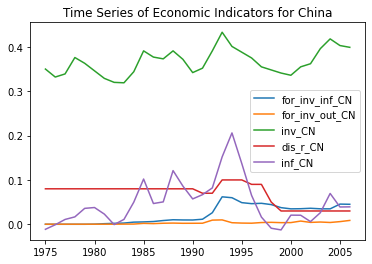

In [106]:
# Plot the line charts for each variable

CN.plot.line(title="Time Series of Economic Indicators for China");

In [97]:
# Plot foreign investment inflows against the rest of variables in China dataset

TypeError: 'str' object is not callable

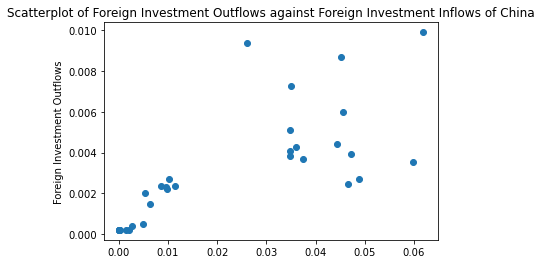

In [133]:
plt.scatter(CN.for_inv_inf_CN, CN.for_inv_out_CN)
plt.title('Scatterplot of Foreign Investment Outflows against Foreign Investment Inflows of China')
plt.ylabel('Foreign Investment Outflows')
plt.xlabel('why')

Higher foreign investment inflows generally accompanied by higher foreign investment outflows, except for a coupe of outliers.

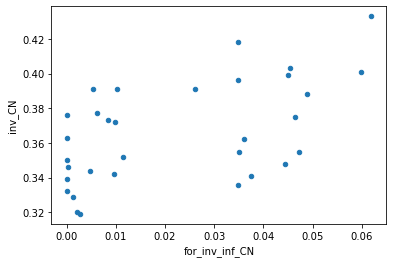

In [99]:
CN.plot.scatter(x='for_inv_inf_CN', y='inv_CN');

Higher foreign investment inflows generally accompanied by higher gross domestic investments.

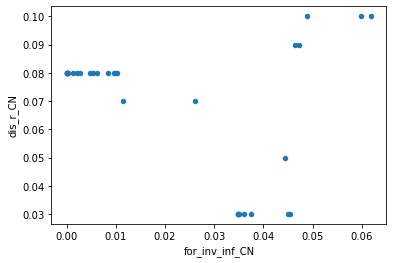

In [100]:
CN.plot.scatter(x='for_inv_inf_CN', y='dis_r_CN');

There are no obvious relationships between foreign investment inflows and central bank discount rate from the scatterplot.

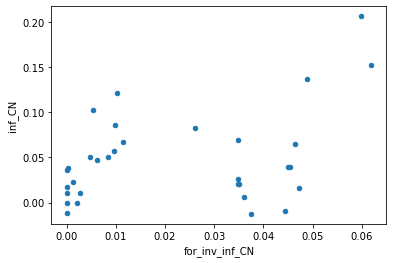

In [101]:
CN.plot.scatter(x='for_inv_inf_CN', y='inf_CN');

There are no obvious relationships between foreign investment inflows and inflation from the scatterplot. A nonlinear relationship may exist.

### Research Question 2

What factors may affect foreign investment inflows in the United States?

In [102]:
# Check the statisticals of US

US.describe()

,for_inv_inf_US,for_inv_out_US,inv_US,dis_r_US,inf_US,tax_rev_US,lis_com_val_US
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.010457,0.010556,0.226156,0.060938,0.038256,0.110397,0.811531
std,0.008202,0.007086,0.013954,0.029551,0.024551,0.009232,0.390345
min,0.001370,0.000848,0.201000,0.010000,0.011300,0.093900,0.394000
25%,0.005370,0.005130,0.217000,0.050000,0.021300,0.103000,0.476000
50%,0.008525,0.009025,0.226000,0.060000,0.030700,0.108500,0.637500
75%,0.013100,0.014250,0.235250,0.072500,0.043150,0.118250,1.252500
max,0.034100,0.030600,0.251000,0.130000,0.094600,0.130000,1.530000


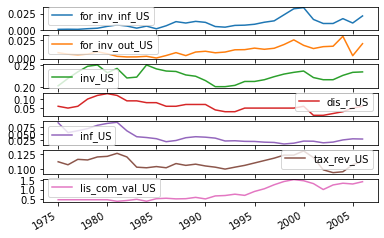

In [103]:
# Plot the line charts for each variable

US.plot.line(subplots=True);

In [ ]:
# Plot foreign investment outflows against the rest of variables in the United States dataset

In [ ]:
US.plot.scatter(x='for_inv_inf_US', y='for_inv_out_US');

Higher foreign investment inflows generally accompanied by higher foreign investment outflows.

In [ ]:
US.plot.scatter(x='for_inv_inf_US', y='inv_US');

Most of the dots spread in the left half of the scatterplot, not implying any obvious relationship between foreign investment inflows and gross domestic investments.

In [ ]:
US.plot.scatter(x='for_inv_inf_US', y='dis_r_US');

Most of the dots spread in the left half of the scatterplot, not implying any obvious relationship between foreign investment inflows and central bank discount rate.

In [ ]:
US.plot.scatter(x='for_inv_inf_US', y='inf_US');

There are no obvious relationships between foreign investment inflows and inflation from the scatterplot. A nonlinear relationship may exist.

In [ ]:
US.plot.scatter(x='for_inv_inf_US', y='tax_rev_US');

There are no obvious relationships between foreign investment inflows and tax revenue from the scatterplot.

In [ ]:
CN.plot.scatter(x='for_inv_inf_CN', y='lis_com_val_CN');

There are no obvious relationships between foreign investment inflows and market value of listed companies from the scatterplot.

<a id='conclusions'></a>
## Conclusions

The findings of the investigation are listed as follows.

> **For China**, higher foreign investment inflows is generally accompanied by higher foreign investment outflows and higher gross domestic investments.
>
> **For the United States**, higher foreign investment inflows is generally accompanied by higher foreign investment outflows.
>
> There may exist nonlinear relationships between foreign investment inflows and inflation in **both countries**.